In [23]:
import gym
from gym import wrappers
import numpy as np
import time, pickle, os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def choose_action(state):
    '''Epsilon-greedy approach for choosing action'''
    action=0
    if np.random.uniform(0, 1) < epsilon:          # Generate random number between 0 and 1
        action = env.action_space.sample()         # If less than epsilon take random action
    else:
        action = np.argmax(Q[state, :])            # Choose action with maximum value in Q-table for state
    return action

def learn(state, state2, reward, action):
    # Q-value for starting state and action taken
    current_q = Q[state, action]

    # Learned value = reward for taking action and reward for optimal action taken in end state
    target = reward + gamma * np.max(Q[state2, :])

    # Updated Q-value of the starting state
    Q[state, action] = current_q + lr_rate * (target - current_q)

def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores), np.std(scores)

def extract_policy(q_sa):
    """ Extract the policy given a q-table"""
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        policy[s] = np.argmax(q_sa[s])
    return policy


In [3]:
# Choose appropriate variables
envs = ['FrozenLake-v0', 'FrozenLake8x8-v0']
env = gym.make(envs[1])  # Initialize game
# ACTIONS: [0,1,2,3] = [L, D, R, U]

total_episodes = 5000              # Number of times game is played
max_steps = 1000                   # Max number of steps per episode
gamma = 0.99                       # Discount Factor
lr_decay_constant = 600
lr_rate = lr_decay_constant / (lr_decay_constant + 0)        # Learning rate, rate of adjustment of q-table for particular state action pair

epsilon = 1.0                     # Epsilon greedy approach, probability of taking random action
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.0002                # Exponential decay rate for exploration

Q = np.zeros((env.observation_space.n, env.action_space.n))       # Q-table (16 x 4 matrix or 64 x 4 matrix)
q_policy_scores = []
q_policy_stds = []

In [4]:
# Start
t_start = time.time()
for episode in range(total_episodes):
    # print('-----------------')
    # print('Episode:', episode)
    # print('-----------------')
    state = env.reset()
    t = 0                             # Number of time steps

    while t < max_steps:
        # env.render()

        # Action based on epsilon-greedy approach
        action = choose_action(state)
        # new_state, reward_for_action, done=true if episode has terminated info gives debugging info
        state2, reward, done, info = env.step(action)
        # Update Q-table
        learn(state, state2, reward, action)
        state = state2
        t += 1
        if done:
            break

        time.sleep(0.1)

    # Decay epsilon after each episode to transition from exploration to exploitation
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)
    # Decay learning_rate
    lr_rate = lr_decay_constant / (lr_decay_constant + episode)

    if episode % 50 == 0:
        print('-----------------')
        print('Episode:', episode)
        print('-----------------')
        q_policy = extract_policy(Q)
        q_policy_score, q_policy_std = evaluate_policy(env, q_policy, gamma, n=1000)
        q_policy_scores.append(q_policy_score)
        q_policy_stds.append(q_policy_std)
        print('Q-Learning policy average score = ', q_policy_score, '+/-', q_policy_std)
        print('Learning rate:', lr_rate)
        print('Exploration/Exploitation epsilon:', epsilon)

t_end = time.time()
print('Time lapsed:', t_end - t_start)

print('Q-table:')
print(Q)

q_policy = extract_policy(Q)
print('Q-learning policy:', q_policy)
q_policy_score, q_policy_std = evaluate_policy(env, q_policy, gamma, n=1000)
print('Q-Learning policy average score = ', q_policy_score, '+/-', q_policy_std)

with open("frozenLake_qTable.pkl", 'wb') as f:
    pickle.dump(Q, f)

-----------------
Episode: 0
-----------------
Q-Learning policy average score =  -17.276617023752582 +/- 0.7410952586285449
Learning rate: 1.0
Exploration/Exploitation epsilon: 1.0
-----------------
Episode: 50
-----------------
Q-Learning policy average score =  -3.7508879388130474 +/- 2.9835378091149036
Learning rate: 0.9230769230769231
Exploration/Exploitation epsilon: 0.9901493354116764
-----------------
Episode: 100
-----------------
Q-Learning policy average score =  -1.257414601832513 +/- 0.3541332122532034
Learning rate: 0.8571428571428571
Exploration/Exploitation epsilon: 0.9803966865736877
-----------------
Episode: 150
-----------------
Q-Learning policy average score =  -1.2475718251046006 +/- 0.355801994417753
Learning rate: 0.8
Exploration/Exploitation epsilon: 0.970741078213023
-----------------
Episode: 200
-----------------
Q-Learning policy average score =  -1.35038359994058 +/- 0.4523421368960508
Learning rate: 0.75
Exploration/Exploitation epsilon: 0.9611815447608


-----------------
Episode: 2000
-----------------
Q-Learning policy average score =  -1.2201338124528047 +/- 0.32117690806538246
Learning rate: 0.23076923076923078
Exploration/Exploitation epsilon: 0.6736168455752829
-----------------
Episode: 2050
-----------------
Q-Learning policy average score =  -1.2160032065917477 +/- 0.4015207500581558
Learning rate: 0.22641509433962265
Exploration/Exploitation epsilon: 0.6670137476349562
-----------------
Episode: 2100
-----------------
Q-Learning policy average score =  -1.2035157371307945 +/- 0.5003292244488576
Learning rate: 0.2222222222222222
Exploration/Exploitation epsilon: 0.6604763516169062
-----------------
Episode: 2150
-----------------
Q-Learning policy average score =  -1.2303040764880733 +/- 0.42536468007376244
Learning rate: 0.21818181818181817
Exploration/Exploitation epsilon: 0.6540040037760834
-----------------
Episode: 2200
-----------------
Q-Learning policy average score =  -1.209006817879042 +/- 0.44725197172219766
Learnin

-----------------
Episode: 3950
-----------------
Q-Learning policy average score =  1.3965766873062462 +/- 3.865159598793517
Learning rate: 0.13186813186813187
Exploration/Exploitation epsilon: 0.4593063473295323
-----------------
Episode: 4000
-----------------
Q-Learning policy average score =  3.462850636339682 +/- 3.5068501971526578
Learning rate: 0.13043478260869565
Exploration/Exploitation epsilon: 0.45483567447604933
-----------------
Episode: 4050
-----------------
Q-Learning policy average score =  -0.7236850151396154 +/- 4.43360358915227
Learning rate: 0.12903225806451613
Exploration/Exploitation epsilon: 0.4504094855607117
-----------------
Episode: 4100
-----------------
Q-Learning policy average score =  -4.865653827486654 +/- 4.8865703931617634
Learning rate: 0.1276595744680851
Exploration/Exploitation epsilon: 0.44602733796093924
-----------------
Episode: 4150
-----------------
Q-Learning policy average score =  -1.9032059753009711 +/- 4.810678332272393
Learning rate: 

In [13]:
q_policy_score, q_policy_std = evaluate_policy(env, q_policy, gamma, n=1000)
print('Q-Learning policy average score = ', q_policy_score, '+/-', q_policy_std)

Q-Learning policy average score =  -0.9434281472020379 +/- 4.530199328712378


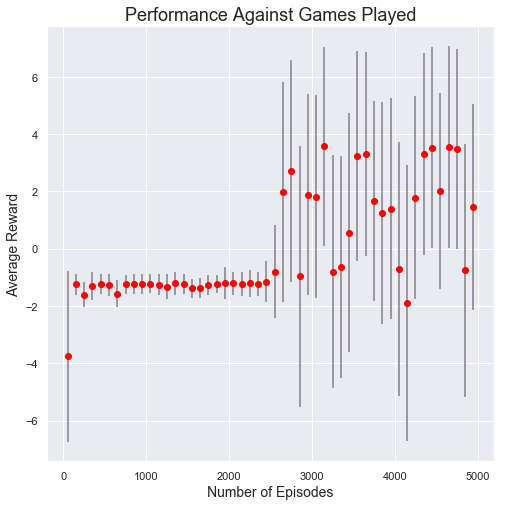

In [49]:
num_episodes = []
epsilons = []
lr_rates = []
for i in range(0, 5000, 50):
    if i == 0:
        num_episodes.append(1)
        epsilons.append(1.0)
        lr_rates.append(lr_decay_constant / (lr_decay_constant + i))
    elif i % 50 == 0:
        num_episodes.append(i)
        epsilons.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * i))
        lr_rates.append(lr_decay_constant / (lr_decay_constant + i))

# a<learning rate decay constant>_e<epsilon_decay_constant>
file_name = 'a600_e0002'   
        
# Plot average reward over time
sns.set()
plt.figure(figsize=(8,8))
plt.errorbar(num_episodes[1::2], q_policy_scores[1::2], q_policy_stds[1::2],
             fmt='o', color='red', ecolor='gray')
plt.title('Performance Against Games Played', fontsize=18)
plt.xlabel('Number of Episodes', fontsize=14)
plt.ylabel('Average Reward', fontsize=14)

plt.savefig('plots/' + file_name + '.png')
plt.show()

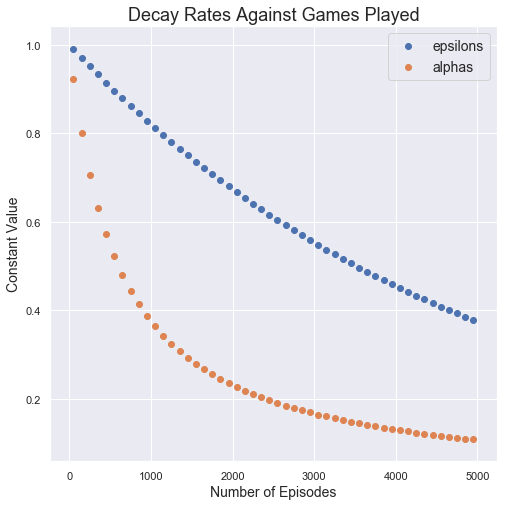

In [50]:
# Plot learning rate decay and epsilon decay
file_name = 'alpha_epsilon_decay'

plt.figure(figsize=(8,8))
plt.scatter(num_episodes[1::2], epsilons[1::2], label='epsilons')
plt.scatter(num_episodes[1::2], lr_rates[1::2], label='alphas')
plt.legend(fontsize=14)
plt.title('Decay Rates Against Games Played', fontsize=18)
plt.xlabel('Number of Episodes', fontsize=14)
plt.ylabel('Constant Value', fontsize=14)

plt.savefig('plots/' + file_name + '.png')
plt.show()